# Problem Statement

### Business Context

A research institute conducts a Talent Hunt Examination every year to hire people who can work on various research projects in the field of Mathematics and Computer Science. **A2Z institute** provides a preparatory program to help the aspirants prepare for the Talent Hunt Exam. The institute has a good record of helping many students clear the exam. Before the application for the next batch starts, the institute wants to attract more aspirants to their program. For this, the institute wants to assure the aspiring students of the quality of results obtained by students enrolled in their program in recent years. 

However, one challenge in estimating an average score is that every year the exam’s difficulty level varies a little, and the distribution of scores also changes accordingly. The institute keeps a track of the final scores of its alumni who attempted the exam previously. A dataset constituted of a simple random sample of final scores of 600 aspirants from the last three years is prepared by the institute.


### Objective

The institute wants to provide an estimate of the average score obtained by aspirants who enroll in their program. Keeping in mind the variation in scores every year, the institute wants to provide a more reliable estimate of the average score using a range of scores instead of a single estimate. It is known from previous records that the standard deviation of the scores is 10 and the cut-off score in the most recent year was 84.

A recent social media post from A2Z institute received feedback from a reputed critic, mentioning that the students from A2Z institute score less than last year's cut-off on average. The institute wants to test if the claim by the critic is valid.


### Solution Approach

1. To provide a more reliable estimate of the average score using a range of scores instead of a single estimate, we will construct a 95% confidence interval for the mean score that an aspirant has scored after enrolling in the institute’s program.

2. To test the validity of the critic's claim (the mean score of the students from A2Z institute is less than last year’s cut-off score of 84), we will perform a hypothesis test (taking alpha = 5%)


### Data 

The dataset provided (*Talent_hunt.csv*) contains the final scores of 600 aspirants enrolled in the institute’s program in the last three years.

# Import libraries



In [1]:
# Libraries to manipulate data
import pandas as pd
import numpy as np

# Libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Library to help with statistical analysis
import scipy.stats as stats 

# Import dataset

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/head-hunting/Talent_hunt.csv


In [4]:
data = pd.read_csv('/kaggle/input/head-hunting/Talent_hunt.csv')

In [6]:
# creating a copy 
df = data.copy()

# Data Overview and Sanity check

In [7]:
df.head()

,final_score
0,85.55
1,81.11
2,91.47
3,83.13
4,82.73


There is only one column `final score` which is the examination score

In [8]:
df.shape

(600, 1)

There are 600 observations in the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   final_score  600 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


The scores of the aspirants are continuous variables

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
final_score,600.0,84.82,4.161787,76.48,81.44,83.715,87.5125,99.47


* The average score obtained from the sample is 84.82
* The median score (83.72) is almost equal to the average, which suggests that the scores might be normally distributed (since they are close to each other)
* Minimum score is around 76 marks and maximum score is around 99

# EDA

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


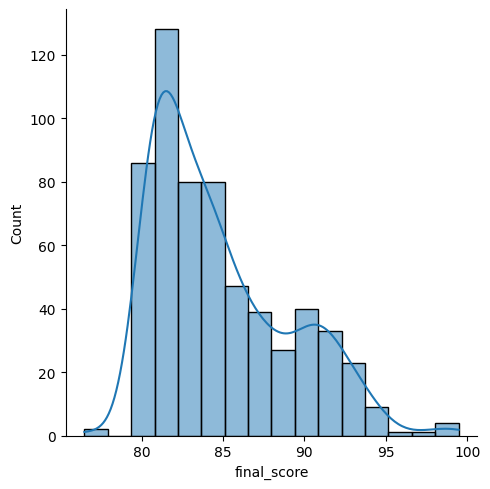

In [13]:
# plot a density curve of the distribution of the scores
sns.displot(df.final_score,kde=True)
plt.show()

* Although we assumed before that the distribution might be normal since the mean and median are close to each other, we can observe skewness to the right. This could be due to some outliers. 

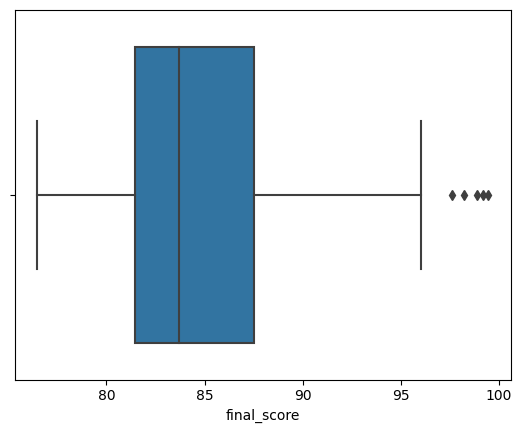

In [14]:
# plot a boxplot to check outliers 
sns.boxplot(x =df.final_score)
plt.show()

* As expected, there are a few outliers at the right tail of the distribution

# Reliable estimate of the average score using confidence intervals

To provide a more reliable estimate of the average score using a range of scores instead of a single estimate, we will construct a 95% confidence interval for the mean score that an aspirant has scored after enrolling in the institute’s program.

* We saw that the distribution of the scores is not strictly normal
* For constructing a confidence interval for the mean score, we need to know the underlying distribution of the mean score, which is not available
* The Central Limit Theorem (CLT) can help us with this

**What is Central Limit Theorem (CLT)?**

The Central Limit Theorem states that the sampling distribution of the sample means will approach a normal distribution as the sample size gets bigger, no matter what the shape of the population distribution is.

Mathematically, if we are drawing multiple samples of size $n$ from a population with mean $\mu$ and standard deviation $\sigma$ and $\bar{X}$ is the random variable representing the sample mean, then $\bar{X}$ tends to follow a normal distribution as $n$ increases.

* The mean of $\bar{X}$ is equal to $\mu$
* The standard deviation of $\bar{X}$ (also called as the standard error) is equal to $\sigma/\sqrt{n}$

**As the data consists of 600 scores (data points), so $n=600 (>30)$. So, using CLT, we can say that the mean score will be approximately normally distributed.**

As the population standard deviation is known, the normal distribution will be used to calculate the confidence interval. The 95% confidence interval for the population mean can be calculated by using the `interval()` function of the `norm` class of `scipy.stats`

* The `interval()` function calculates the endpoints within which the specified percentage of values of the distribution lie, where
  * `alpha / confidence` denotes the confidence level
  * `loc` denotes the mean
  * `scale` denotes the standard deviation

In [17]:
# import the required function
from scipy.stats import norm

# calculate the value of sample mean
x_bar = df.final_score.mean()

# population standard deviation is known to be 10
sigma = 10

#sample size
n = 600

# construct the confidence interval
np.round(norm.interval(confidence=0.95, loc=x_bar, scale=sigma / np.sqrt(n)), 2)

array([84.02, 85.62])

* The 95% confidence interval obtained for the mean score is [84.02, 85.62]. 
* **This means that it is 95% likely that an aspirant enrolled in the institute's program will score, on an average, between 84.02 and 85.62.**

# Validating the critic's claim using a hypothesis test

To test the validity of the critic's claim (the mean score of the students from A2Z institute is less than last year’s cut-off score of 84), we will perform a hypothesis test (taking alpha = 5%)



**Null and alternative hypotheses**

Let $\mu$ be the mean final score of all aspirants who enroll in the institute's program.

The null hypothesis can be written as

>$H_0: \mu >= 84$

against the alternate hypothesis

>$H_a: \mu < 84$

For comparing a sample mean $\bar{x}$ with a hypothesized population mean $\mu$ where the sample size is $n$ and the population standard deviation is known to be $\sigma$, the one-sample z-test is used. The test statistic of the z-test is given as:

$$z = \frac{(\bar{x} - \mu)}{\sigma/\sqrt{n}}\sim N(0,1)$$

The test statistic follows a standard normal distribution.

**Are the assumptions of Z-test satisfied?**

*   Samples are drawn from a normal distribution - Since the sample size is 600(which is > 30), Central Limit Theorem states that the distribution of sample means will be approximately normal.  
*   Observations are from a simple random sample - the institute collected a simple random sample
*   Standard deviation is known - Yes


> *all assumptions are satistified*

**Calculate the Z-statistic value**

In [18]:
# set the values of population mean and population standard deviation 
mu = 84
sigma = 10

# calculate the value of the sample mean from the data
x_bar = df.final_score.mean()


# calculate the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(600))
test_stat

2.008581589082189

**The Z-test statistic follows a standard normal distribution.**

Let's plot the distribution of the Z-test statistic and see where the computed test statistic lies in the plot.

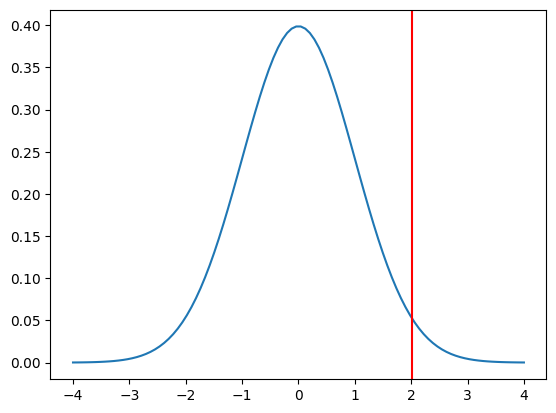

In [19]:
# import the required function
from scipy.stats import norm

# plotting the distribution of Z test statistic along with the computed test statistic
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = test_stat, c = 'r') # draw a vertical red line through the mentioned point
plt.show() # display the plot

As this is a left-tailed test, the p-value will be the area to the left of the test statistic under the standard normal curve.

In [20]:
# calculate the p-value using the cdf() function
norm.cdf(test_stat)

0.9777092372836956

**Insights**

* As the p-value is around 0.978 which is greater than the level of significance (0.05), we fail to reject the null hypothesis

* We do not have enough statistical evidence to say that the mean final score of all aspirants who enroll in the institute's program is less than last year's cutoff of 84

* This result validates the confidence interval as well
  * The 95% confidence interval for the mean final score was [84.02,85.62]
  * Using a statistical hypothesis test at 5% alpha, we did not find significant evidence that the mean final score is less than 84

## Conclusions and Recommendations

* It is 95% likely that an aspirant enrolled in the institute's program will score between 84.02 and 85.62 on an average

* There wasn't enough statistical evidence to support the critic's claim that the mean final score of all aspirants who enroll in the institute's program is less than last year's cut-off of 84

---